In [ ]:
#Qeura_data
# Descriptive Statistics
# Expert request


In [25]:
import mysql.connector
import pandas as pd
import numpy as np
username = 'root'
user_password = '@Mg89141379@'

cnx = mysql.connector.connect(
    user=username,
    password=user_password,
    host='localhost',
    database='football_data_qeura'
)


cursor = cnx.cursor()

query = "SELECT table_name FROM information_schema.tables WHERE table_schema = 'football_data_qeura'"
cursor.execute(query)


results = cursor.fetchall()

# Loop through the table names and create DataFrames for each table
dfs = {}
for row in results:
    table_name = row[0]
    df = pd.read_sql_query(f"SELECT * FROM {table_name}", cnx)
    dfs[table_name] = df
cursor.close()
cnx.close()


for table_name, df in dfs.items():
    print(f"Table Name: {table_name}")
   # print(df)
  #  print()
dfs['players_season']
df = dfs['clubs_season'] 

C:\Users\mehrs\AppData\Local\Temp\ipykernel_20772\3529335382.py:27: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(f"SELECT * FROM {table_name}", cnx)


Table Name: clubs
Table Name: clubs_season
Table Name: competitions
Table Name: national
Table Name: players
Table Name: players_season
Table Name: transfers


In [26]:
dfs['clubs_season']
dfs['players_season']
dfs['clubs_season'] = dfs['clubs_season'].loc[dfs['clubs_season']['competition_id'].isin(['ligue-1', 'laliga','serie-a','premier-league','bundesliga'])]
temp = dfs['players_season']
temp = temp[temp['season'] == 2021] 
temp_club = dfs['clubs_season']
temp_club = temp_club[temp_club['season'] == 2021] 
temp_club

,id,club_id,season,competition_id,rank,matches,win,draw,loss,goals_scored,goals_conceded,players_avg_age
36,37,583,2021,ligue-1,1,None,None,None,None,None,None,None
58,59,5,2021,serie-a,1,None,None,None,None,None,None,None
75,76,418,2021,laliga,1,None,None,None,None,None,None,None
108,109,281,2021,premier-league,1,None,None,None,None,None,None,None
154,155,27,2021,bundesliga,1,None,None,None,None,None,None,None


In [27]:
merged_df = pd.merge(temp,temp_club,on = 'club_id')
merged_df

,id_x,player_id,season_x,club_id,squad,appearance,point_per_goal,goals,assits,own_goals,...,season_y,competition_id,rank,matches,win,draw,loss,goals_scored,goals_conceded_y,players_avg_age
0,1921,344600,2021,27.0,6.0,1.0,3.00,NaN,NaN,NaN,...,2021,bundesliga,1,None,None,None,None,None,None,None
1,1922,344600,2021,27.0,3.0,0.0,0.00,NaN,NaN,NaN,...,2021,bundesliga,1,None,None,None,None,None,None,None
2,1923,344600,2021,27.0,1.0,1.0,3.00,1.0,1.0,NaN,...,2021,bundesliga,1,None,None,None,None,None,None,None
3,7528,159471,2021,27.0,34.0,34.0,2.26,14.0,5.0,NaN,...,2021,bundesliga,1,None,None,None,None,None,None,None
4,7529,159471,2021,27.0,8.0,8.0,2.13,3.0,1.0,NaN,...,2021,bundesliga,1,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
556,245315,339808,2021,5.0,4.0,4.0,1.75,NaN,3.0,NaN,...,2021,serie-a,1,None,None,None,None,None,None,None
557,245316,339808,2021,5.0,5.0,5.0,0.80,NaN,1.0,NaN,...,2021,serie-a,1,None,None,None,None,None,None,None
558,249054,582302,2021,5.0,1.0,0.0,0.00,NaN,NaN,NaN,...,2021,serie-a,1,None,None,None,None,None,None,None
559,250318,698548,2021,5.0,4.0,0.0,0.00,NaN,NaN,NaN,...,2021,serie-a,1,None,None,None,None,None,None,None


In [28]:
merged_df = merged_df[['squad','appearance','competition_id']]


In [29]:
#############
# First 
###########

In [30]:
import pandas as pd
merged_df = merged_df[merged_df['squad'] > 14]

merged_df['percentage'] = (merged_df['appearance'] / merged_df['squad']) *100
# Merge the two dataframes based on player_id and season_id
#merged_df = pd.merge(dfs['players_season'], dfs['clubs_season'], on=['club_id', 'club_id'])[['player_id','squad','appearance']]
merged_df = merged_df.sort_values(by='percentage', ascending=False)

In [31]:
merged_df.drop_duplicates(inplace=True)
merged_df

,squad,appearance,competition_id,percentage
3,34.0,34.0,bundesliga,100.000000
80,22.0,22.0,bundesliga,100.000000
529,31.0,31.0,serie-a,100.000000
481,32.0,32.0,serie-a,100.000000
453,35.0,35.0,laliga,100.000000
...,...,...,...,...
443,34.0,2.0,laliga,5.882353
226,30.0,1.0,premier-league,3.333333
246,18.0,0.0,premier-league,0.000000
540,29.0,0.0,serie-a,0.000000


In [32]:
Players_median = merged_df.groupby('competition_id').median()
Players_mean =  merged_df.groupby('competition_id').mean()

In [33]:
Players_mean

,squad,appearance,percentage
competition_id,,,
bundesliga,25.136364,19.045455,72.787711
laliga,29.500000,21.125000,67.736533
ligue-1,27.086957,20.739130,74.136383
premier-league,32.600000,22.700000,66.475465
serie-a,31.363636,21.954545,69.521227


In [34]:
Players_median

,squad,appearance,percentage
competition_id,,,
bundesliga,24.5,20.5,90.097403
laliga,30.5,25.0,78.078078
ligue-1,29.0,22.0,82.758621
premier-league,34.0,27.5,77.460317
serie-a,31.5,25.0,87.142857


In [35]:
merged_df['appearance']= merged_df['appearance'].astype('int')

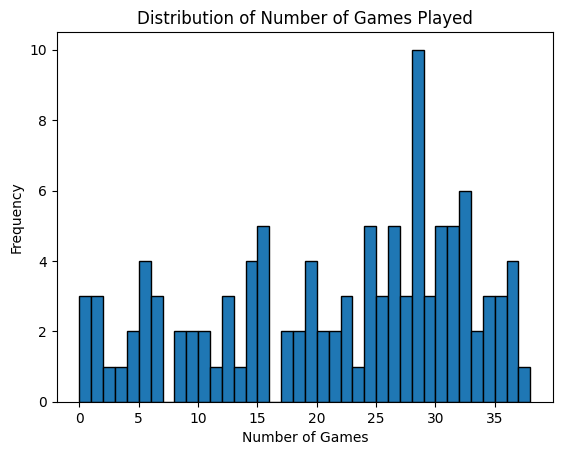

In [36]:
import matplotlib.pyplot as plt

# Plot the histogram with integer bins
plt.hist(merged_df['appearance'], bins=range(min(merged_df['appearance']), max(merged_df['appearance']) + 2), edgecolor='black')

# Set the labels and title
plt.xlabel('Number of Games')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Games Played')


plt.show()


In [37]:
#############
# First_2
###########


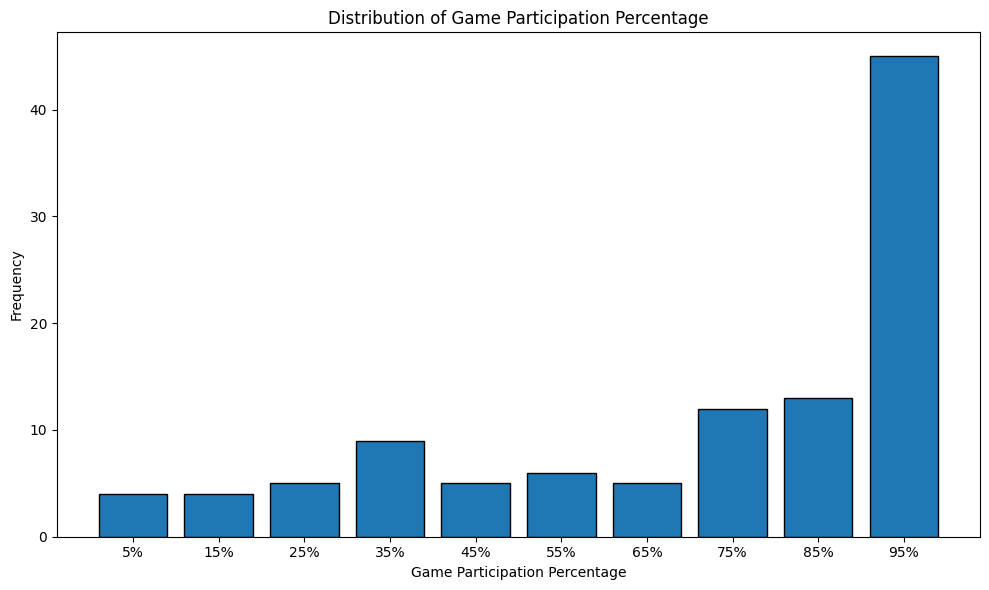

In [38]:

ranges = np.arange(0, 110, 10)

percentage_counts = pd.cut(merged_df['percentage'], ranges).value_counts().sort_index()

x = np.arange(len(ranges) - 1)
y = percentage_counts.values

plt.figure(figsize=(10, 6))
plt.bar(x, y, align='center', edgecolor='black')

# Set the x-tick labels
plt.xticks(x, labels=ranges[:-1])

plt.xlabel('Game Participation Percentage')
plt.ylabel('Frequency')
plt.title('Distribution of Game Participation Percentage')
group_midpoints = (ranges[:-1] + ranges[1:]) / 2
plt.xticks(x, labels=[f'{midpoint_val:.0f}%' for midpoint_val in group_midpoints])
plt.tight_layout()
plt.show()


In [39]:
merged_df

,squad,appearance,competition_id,percentage
3,34.0,34,bundesliga,100.000000
80,22.0,22,bundesliga,100.000000
529,31.0,31,serie-a,100.000000
481,32.0,32,serie-a,100.000000
453,35.0,35,laliga,100.000000
...,...,...,...,...
443,34.0,2,laliga,5.882353
226,30.0,1,premier-league,3.333333
246,18.0,0,premier-league,0.000000
540,29.0,0,serie-a,0.000000


In [40]:
#############
# Second
###########
# valus in players
# goals in player_season
dfs['clubs_season']
dfs['players_season']
dfs['clubs_season'] = dfs['clubs_season'].loc[dfs['clubs_season']['competition_id'].isin(['ligue-1', 'laliga','serie-a','premier-league','bundesliga'])]
temp = dfs['players_season']
temp = temp[temp['season'] == 2021] 

temp_club = dfs['clubs_season']
temp_club = temp_club[temp_club['season'] == 2021] 
temp_club
merged_df = pd.merge(temp,temp_club,on = 'club_id')
merged_df = merged_df[merged_df['squad'] > 14]
merged_df = pd.merge(merged_df,dfs['players'],left_on='player_id',right_on='id')
merged_df = merged_df[['competition_id','player_id','goals','current_value','position_x']]
merged_df

,competition_id,player_id,goals,current_value,position_x
0,bundesliga,159471,14.0,20000000.0,Right Winger
1,bundesliga,58358,8.0,30000000.0,Second Striker
2,bundesliga,467437,NaN,500000.0,Attacking Midfield
3,bundesliga,243714,6.0,65000000.0,Left Winger
4,bundesliga,483046,1.0,400000.0,Right-Back
...,...,...,...,...,...
115,serie-a,22141,NaN,2000000.0,Goalkeeper
116,serie-a,357164,11.0,70000000.0,Left Winger
117,serie-a,55282,NaN,4000000.0,Goalkeeper
118,serie-a,187587,2.0,17000000.0,Left Winger


In [41]:
correlation = merged_df['goals'].corr(merged_df['current_value'])
print('Linear Correlation:', correlation)

Linear Correlation: 0.13326721573307412


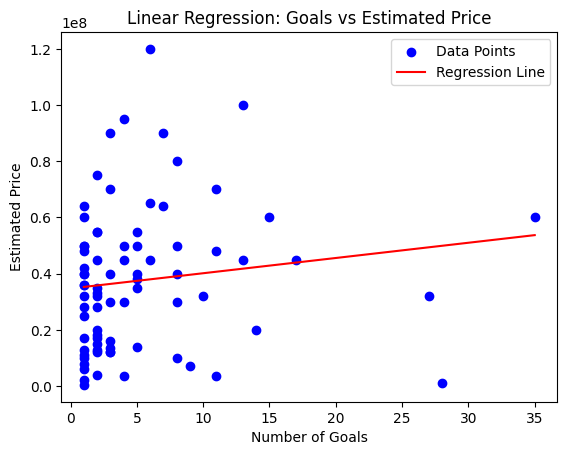

In [44]:
from scipy.stats import stats
data = merged_df[['goals', 'current_value']].dropna()

# linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(data['goals'], data['current_value'])

# Create a scatter plot of the data points
plt.scatter(data['goals'], data['current_value'], color='b', label='Data Points')


x = np.linspace(data['goals'].min(), data['goals'].max(), 100)
y = slope * x + intercept


plt.plot(x, y, color='r', label='Regression Line')

plt.xlabel('Number of Goals')
plt.ylabel('Estimated Price')
plt.title('Linear Regression: Goals vs Estimated Price')

plt.legend()


plt.show()




In [45]:
######
## forth
#######


In [46]:
merged_df['position_x'].unique()

array(['Right Winger', 'Second Striker', 'Attacking Midfield',
       'Left Winger', 'Right-Back', 'Defensive Midfield', 'Centre-Back',
       'Centre-Forward', 'Left-Back', 'Goalkeeper', 'Central Midfield',
       'Right Midfield'], dtype=object)

In [47]:
#should change the conditon with the real data
merged_df_attack = merged_df.loc[merged_df['position_x'].isin(['Centre-Forward', 'Second Striker'])]


In [48]:
correlation = merged_df_attack['goals'].corr(merged_df_attack['current_value'])
print('Linear Correlation:', correlation)

Linear Correlation: 0.0029247353801630043


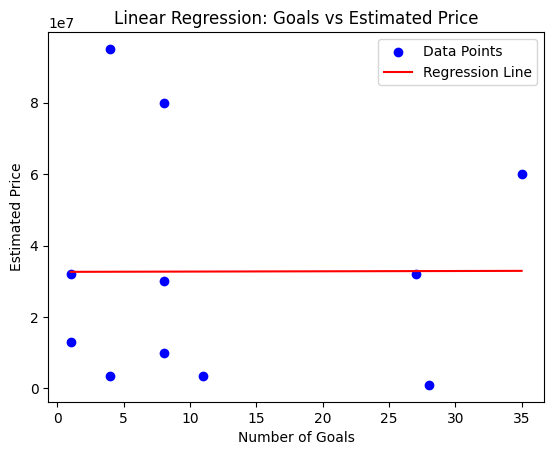

In [49]:

data = merged_df_attack[['goals', 'current_value']].dropna()

# linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(data['goals'], data['current_value'])

# Create a scatter plot of the data points
plt.scatter(data['goals'], data['current_value'], color='b', label='Data Points')


x = np.linspace(data['goals'].min(), data['goals'].max(), 100)
y = slope * x + intercept


plt.plot(x, y, color='r', label='Regression Line')

plt.xlabel('Number of Goals')
plt.ylabel('Estimated Price')
plt.title('Linear Regression: Goals vs Estimated Price')

plt.legend()


plt.show()


# ehtemalan bekhate datahaye kami ke darim az bazikon ha

In [50]:
merged_df

,competition_id,player_id,goals,current_value,position_x
0,bundesliga,159471,14.0,20000000.0,Right Winger
1,bundesliga,58358,8.0,30000000.0,Second Striker
2,bundesliga,467437,NaN,500000.0,Attacking Midfield
3,bundesliga,243714,6.0,65000000.0,Left Winger
4,bundesliga,483046,1.0,400000.0,Right-Back
...,...,...,...,...,...
115,serie-a,22141,NaN,2000000.0,Goalkeeper
116,serie-a,357164,11.0,70000000.0,Left Winger
117,serie-a,55282,NaN,4000000.0,Goalkeeper
118,serie-a,187587,2.0,17000000.0,Left Winger


In [51]:
#############
# Fifth
###########

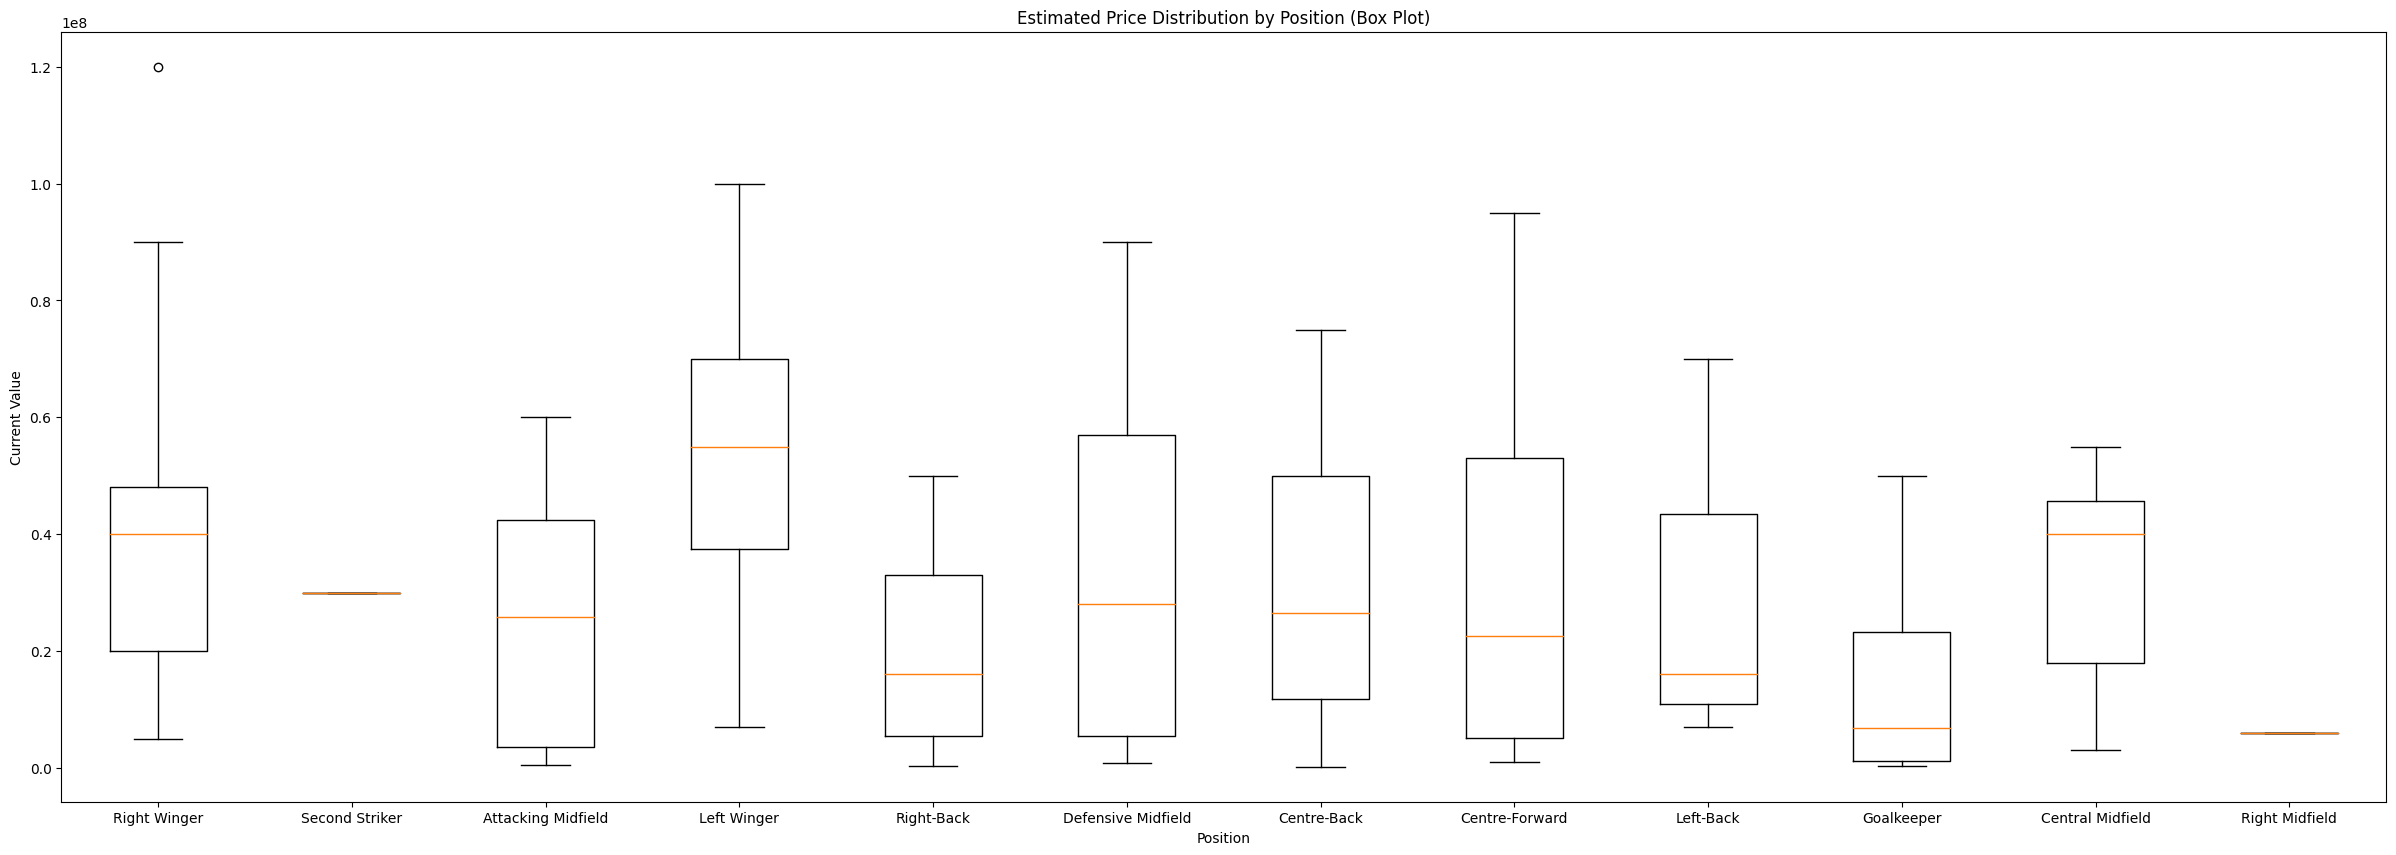

In [52]:

filtered_data = merged_df.dropna(subset=['current_value'])

data = [filtered_data[filtered_data['position_x'] == pos]['current_value'] for pos in filtered_data['position_x'].unique()]

# Create the box plot
plt.figure(figsize=(30, 10))
plt.boxplot(data, labels=filtered_data['position_x'].unique())

plt.xlabel('Position')
plt.ylabel('Current Value')
plt.title('Estimated Price Distribution by Position (Box Plot)')

plt.show()


In [53]:
####
# Goals in diffrent leagues
###
merged_df


,competition_id,player_id,goals,current_value,position_x
0,bundesliga,159471,14.0,20000000.0,Right Winger
1,bundesliga,58358,8.0,30000000.0,Second Striker
2,bundesliga,467437,NaN,500000.0,Attacking Midfield
3,bundesliga,243714,6.0,65000000.0,Left Winger
4,bundesliga,483046,1.0,400000.0,Right-Back
...,...,...,...,...,...
115,serie-a,22141,NaN,2000000.0,Goalkeeper
116,serie-a,357164,11.0,70000000.0,Left Winger
117,serie-a,55282,NaN,4000000.0,Goalkeeper
118,serie-a,187587,2.0,17000000.0,Left Winger


In [54]:
goals_each_leuge = merged_df.groupby('competition_id').sum()['goals']


In [55]:
goals_each_leuge

competition_id
bundesliga        92.0
laliga            79.0
ligue-1           85.0
premier-league    94.0
serie-a           61.0
Name: goals, dtype: float64

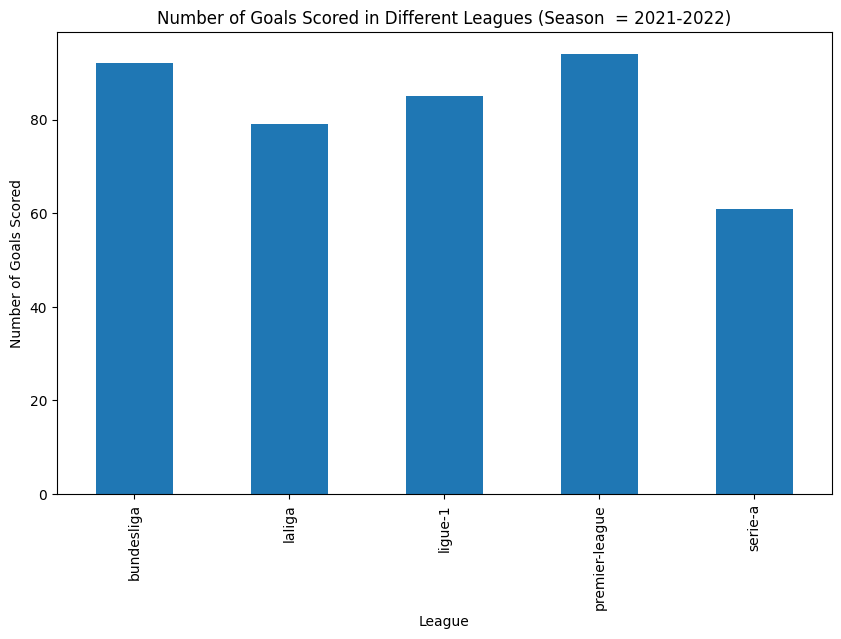

In [56]:
plt.figure(figsize=(10, 6))
goals_each_leuge.plot(kind='bar')
plt.xlabel('League')
plt.ylabel('Number of Goals Scored')
plt.title('Number of Goals Scored in Different Leagues (Season  = 2021-2022)')
plt.xticks(rotation=90)
plt.show()

In [57]:
#############
# Sixth
###########


In [58]:

transfer_merged = dfs['transfers'].merge(dfs['clubs'], left_on='destination_club_id', right_on='id')
transfer_merged = transfer_merged[['destination_club_id','fee','season_x','market_value']]

transfer_merged = transfer_merged[transfer_merged['season_x'] > 2017]
transfer_merged = transfer_merged[transfer_merged['season_x'] < 2023]
transfer_merged = transfer_merged[transfer_merged['fee'] > 0]
transfer_merged = pd.merge(transfer_merged,dfs['clubs'],left_on='destination_club_id',right_on='id')
transfer_merged = transfer_merged[['name','fee','season_x','market_value']]


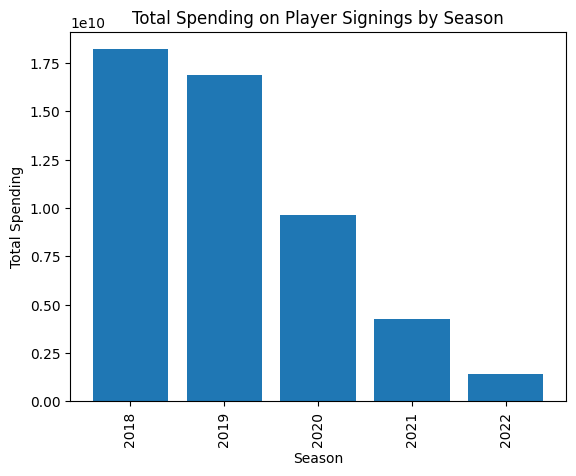

In [59]:

total_spending_by_season = transfer_merged.groupby('season_x')['fee'].sum()

plt.bar(total_spending_by_season.index, total_spending_by_season.values)

# Set labels and title
plt.xlabel('Season')
plt.ylabel('Total Spending')
plt.title('Total Spending on Player Signings by Season')

plt.xticks(rotation=90);

# wrong data_porbpaly

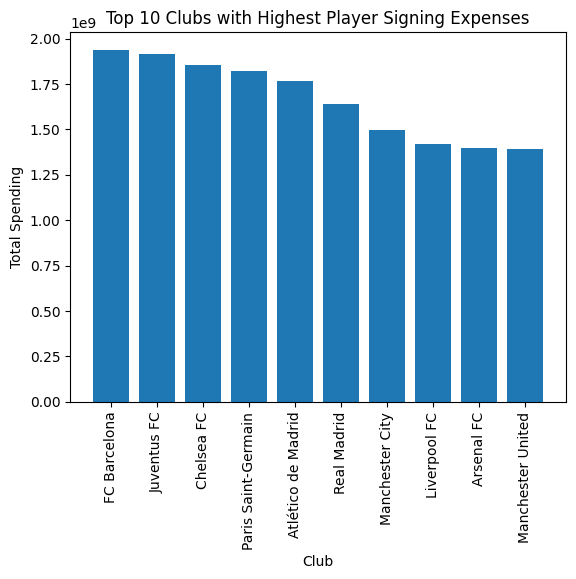

In [60]:
import pandas as pd
import matplotlib.pyplot as plt

total_spending_by_club = transfer_merged.groupby('name')['fee'].sum()


top_10_clubs = total_spending_by_club.sort_values(ascending=False).head(10)

# Create a bar chart
plt.bar(top_10_clubs.index, top_10_clubs.values)

# Set labels and title
plt.xlabel('Club')
plt.ylabel('Total Spending')
plt.title('Top 10 Clubs with Highest Player Signing Expenses')

# Rotate x-axis labels if needed
plt.xticks(rotation=90)

# Display the chart
plt.show()
